# Start doing multiple columns

In [1]:
import pandas as pd 
import numpy as np
import scipy 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('colorblind')

# Code for generation of bedrock and soil - height changed

In [2]:
import numpy as np
from scipy.stats import qmc

def generate_data(num_models, Vs_soil_range=(np.log10(100),np.log10(360)), Vs_bedrock_range=(np.log10(760), np.log10(1500)), n_Vs = 1000, h_range=(1, 29)):

    models = []  # Initialize arrays list

    sampler = qmc.LatinHypercube(d=2) # Create a Latin Hypercube Sampler with 3 dimensions

    lower_bound = [Vs_soil_range[0], Vs_bedrock_range[0]] # Lower bound for the sampler
    upper_bound = [Vs_soil_range[1], Vs_bedrock_range[1],] # Upper bound for the sampler

    scaled_samples = qmc.scale(sampler.random(n_Vs), lower_bound, upper_bound) # Generate n_Vs samples

    # Integer sampling
    sampler = qmc.LatinHypercube(d=1) # Create a Latin Hypercube Sampler with 1 dimension
    h_soil_array = sampler.integers(l_bounds=h_range[0], u_bounds=h_range[1]+1, n=n_Vs, endpoint=True) # Generate n_Vs samples

    # Uniformly sample the height of the soil layer
    #h_soil_array = rng.integers(h_range[0], h_range[1]+1, size=num_models, endpoint=True)

    for i in range(num_models): # Loop over the number of models
        Vs_s, Vs_b = scaled_samples[i]
        #Vs_s, Vs_b = scaled_samples[i]
        h_soil = h_soil_array[i]
        # Un log the Vs values
        Vs_s = 10**Vs_s
        Vs_b = 10**Vs_b
        #h_soil = int(h_soil)
        # Creation of the array
        soil_array = np.full(h_soil, Vs_s) # Generate an array of Vs_s values
        bedrock_array = np.array([Vs_b]) # Generate an array of Vs_b values
        array = np.concatenate([soil_array, bedrock_array]) # Concatenate the two arrays
        models.append(array) # Append the array to the list

    return models

# Example usage
A = generate_data(1000)

# Mean height of the soil layer
avg_len = 0
for a in A:
    avg_len += len(a)
avg_len /= len(A)
print(avg_len, avg_len*5)

Vs_soil = []
Vs_bedrock = []
h = []
for a in A:
    Vs_soil.append(np.mean(a[:-1]))
    Vs_bedrock.append(a[-1])
    h.append((len(a)-1)*5)


16.498 82.49000000000001


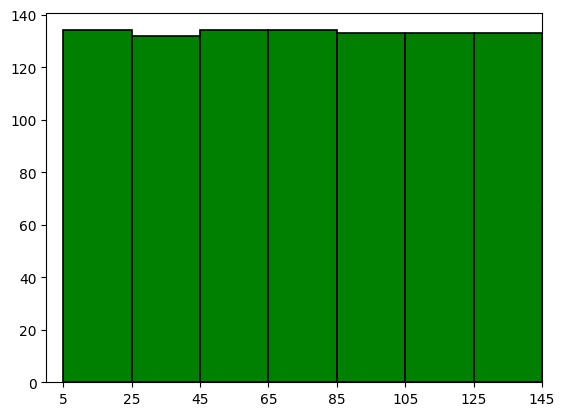

In [3]:
binwidth = 4*5
plt.hist(h, bins=np.arange(min(h), max(h)+binwidth, binwidth), edgecolor='black', linewidth=1.2, color='green')
plt.xticks(np.arange(min(h), max(h)+binwidth, binwidth))
plt.xlim(0, 29*5)
plt.show()

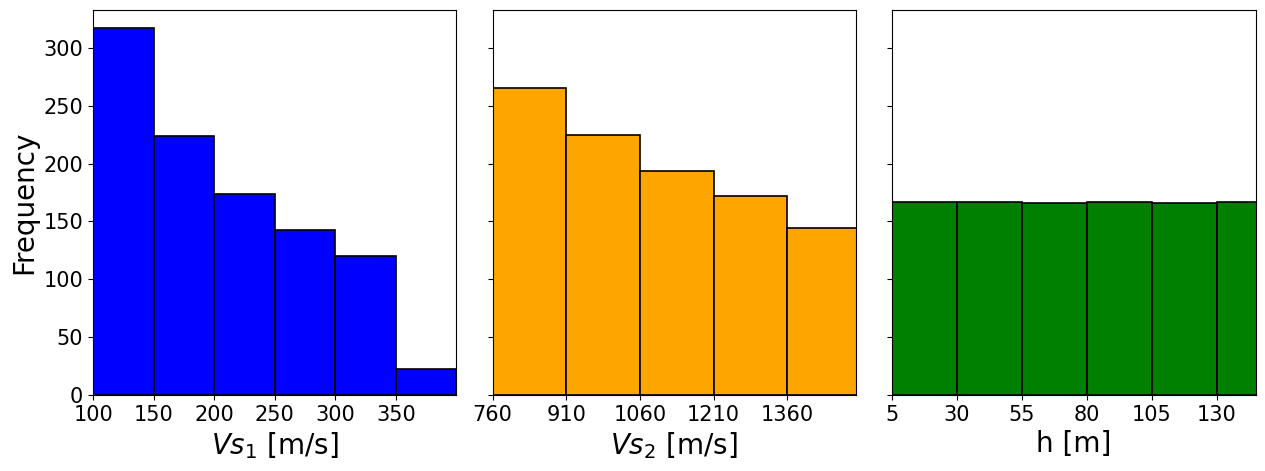

In [14]:
fig, ax = plt.subplots(1, 3, figsize=(15,5), sharey=True)
# Vs_soil
binwidth = 50
ax[0].hist(Vs_soil, bins=np.arange(min(Vs_soil), max(Vs_soil)+binwidth, binwidth), edgecolor='black', linewidth=1.2, color='blue')
ax[0].set_xticks(np.arange(min(Vs_soil), max(Vs_soil)+binwidth, binwidth))
ax[0].set_xlim(100, 400)
ax[0].set_xlabel('$Vs_1$ [m/s]', fontsize=20)
# Vs_bedrock
binwidth = 150
ax[1].hist(Vs_bedrock, bins=np.arange(760, max(Vs_bedrock)+binwidth, binwidth), 
edgecolor='black', linewidth=1.2, color='orange')
ax[1].set_xticks(np.arange(760, max(Vs_bedrock)+binwidth, binwidth))
ax[1].set_xlim(760, 1500)
ax[1].set_xlabel('$Vs_2$ [m/s]', fontsize=20)
# h
binwidth = 5*5
ax[2].hist(h, bins=np.arange(min(h), max(h)+binwidth, binwidth), edgecolor='black', linewidth=1.2, color='green')
ax[2].set_xticks(np.arange(min(h), max(h)+binwidth, binwidth))
ax[2].set_xlim(1*5, 29*5)
ax[2].set_xlabel('h [m]', fontsize=20)

# Increase ylabel font size
ax[0].set_ylabel('Frequency', fontsize=20)
for a in ax:
    a.tick_params(axis='both', labelsize=15)
    
# Reduce the space between the subplots
plt.subplots_adjust(wspace=0.01, hspace=0.0001)

# Share the y axis
#plt.tight_layout()
plt.subplots_adjust(wspace=0.1)
plt.show()

(1.0, 29.0)

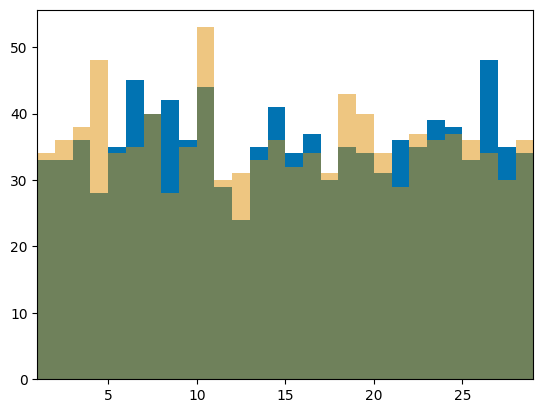

In [263]:
# Heigth range
h_range = (1, 29)

rng = np.random.default_rng()

# Generate the data
h_array = rng.integers(h_range[0], h_range[1], size=1000)
h_array_2 = scipy.stats.randint.rvs(h_range[0], h_range[1], size=1000)

# Plot the histogram
plt.hist(h_array, bins=range(h_range[0], h_range[1]+1), label='Numpy')
plt.hist(h_array_2, bins=range(h_range[0], h_range[1]+1), alpha=0.5, label='Scipy')
plt.xlim(1, 29)

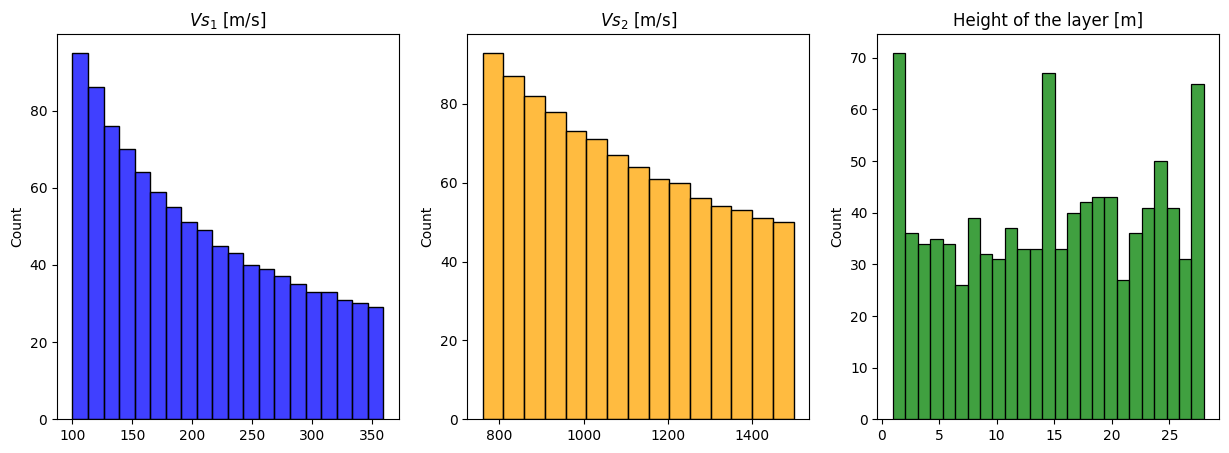

In [264]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))
# Vs_soil
ax[0] = sns.histplot(Vs_soil, ax=ax[0], color='blue', binwidth=13)
#ax[0].set_x_ticks(bins_edges)
ax[0].set_title('$Vs_1$ [m/s]')
ax[1] = sns.histplot(Vs_bedrock, ax=ax[1], binwidth=50, color='orange')
ax[1].set_title('$Vs_2$ [m/s]')
ax[2] = sns.histplot(h, ax=ax[2], bins=25, color='green')
ax[2].set_title('Height of the layer [m]')
plt.show()

In [20]:
[*range(100,360,50), 360]

[100, 150, 200, 250, 300, 350, 360]

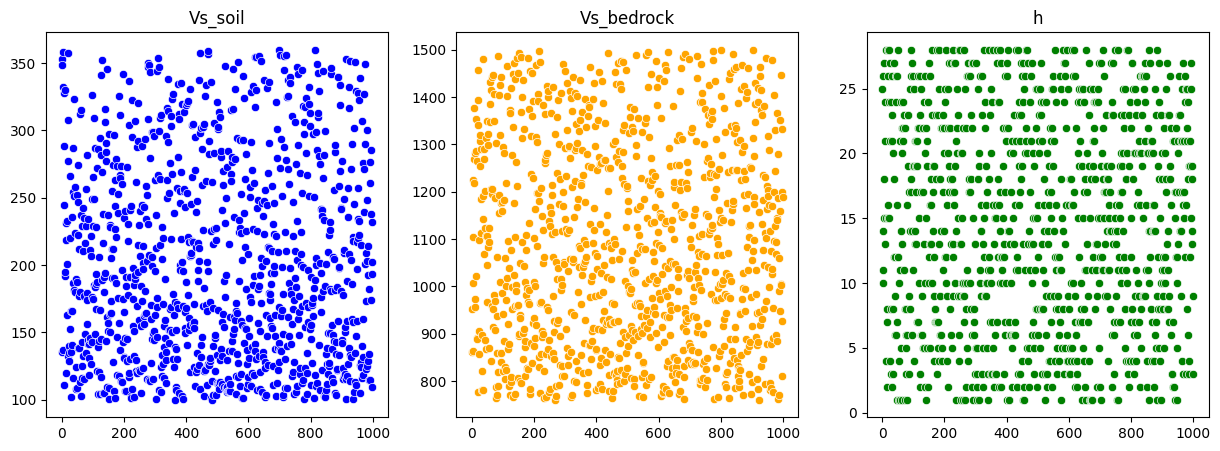

In [234]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))
ax[0] = sns.scatterplot(x=range(len(Vs_soil)), y=Vs_soil, ax=ax[0], color='blue')
ax[0].set_title('Vs_soil')
ax[1] = sns.scatterplot(x=range(len(Vs_bedrock)), y=Vs_bedrock, ax=ax[1], color='orange')
ax[1].set_title('Vs_bedrock')
ax[2] = sns.scatterplot(x=range(len(h)), y=h, ax=ax[2], color='green')
ax[2].set_title('h')
plt.show()

# Save results

In [235]:
# Find the maximum length of the arrays
max_len = max(len(a) for a in A)

# Pad arrays with NaN to make them the same length
padded_arrays = [np.pad(a, (0, max_len - len(a)), constant_values=np.nan) for a in A]

# Create a DataFrame from the padded arrays
df = pd.DataFrame(padded_arrays)

# Save the DataFrame to a CSV file
df.to_csv(r'model_arrays_HLC.csv', index=False)

print("Data saved to Vs_arrays.csv")

Data saved to Vs_arrays.csv


In [141]:
# Save model arrays to a CSV file
#df = pd.read_csv(r"..\1D Soil_Bedrock\model_arrays.csv")
#df.to_csv('model_arrays.csv', index=False)